## Importing libraries

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report
from sklearn.naive_bayes import MultinomialNB

In [ ]:
dataframe = pd.read_csv('train.csv')
dataframe.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Data Preprocessing

In [ ]:
dataframe.fillna(" ", inplace= True)
dataframe.head()
dataframe['content'] = dataframe['title'] + " " + dataframe['author']

## Stemming

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    #replace any non-alphabetic characters in the content variable with a space character
    stemmed_content= re.sub('[^a-zA-Z]',' ',content)
    #Convert all words into lower case letters
    stemmed_content = stemmed_content.lower() 
    # Split the words into list
    stemmed_content = stemmed_content.split()
    #generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    #Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataframe['content']= dataframe['content'].apply(stemming)

In [ ]:
dataframe['content']

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object

## Converting the textual data to numerical data

In [ ]:
x = dataframe['text']
y = dataframe['label']

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(dataframe['content'].values)
tfidf = transformer.fit_transform(counts)

In [ ]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)

## Split data into train & test data

In [ ]:
targets = dataframe['label'].values

In [ ]:
print(f"target shape: {targets.shape}")
print(f"X shape: {tfidf.shape}")

target shape: (20800,)
X shape: (20800, 131551)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
tfid_x_train = tfvect.fit_transform(X_train.values.astype('U'))
tfid_x_test = tfvect.transform(X_test.values.astype('U'))

## Functions

In [ ]:
def train(model , model_name):
    model.fit(tfid_x_train,y_train)
    print(f"Training accuracy of {model_name} is {model.score(tfid_x_train,y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(tfid_x_test,y_test)}")

def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        tfid_x_test,
        y_test
    )

def class_report(model):
    print(classification_report(
        y_test,
        model.predict(tfid_x_test)
    ))

## LogisticRegression

In [ ]:
model_lr = LogisticRegression()

In [ ]:
train(model_lr, 'LogisticRegression')

Training accuracy of LogisticRegression is 0.9740384615384615
testing accuracy of LogisticRegression is 0.9447115384615384


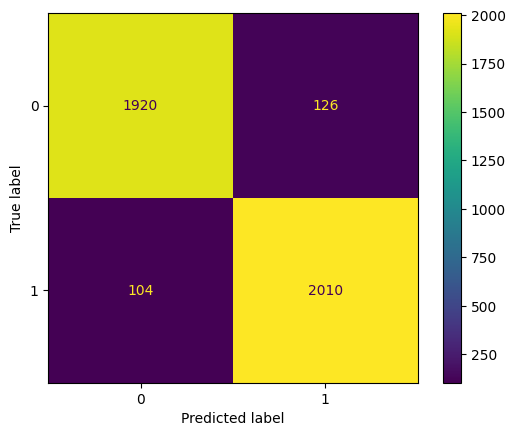

In [ ]:
conf_matrix(model_lr)

In [ ]:
class_report(model_lr)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2046
           1       0.94      0.95      0.95      2114

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160



## SVM

In [ ]:
svc_model= SVC()

In [ ]:
train(svc_model, 'SVM')

Training accuracy of SVM is 0.9989182692307692
testing accuracy of SVM is 0.9600961538461539


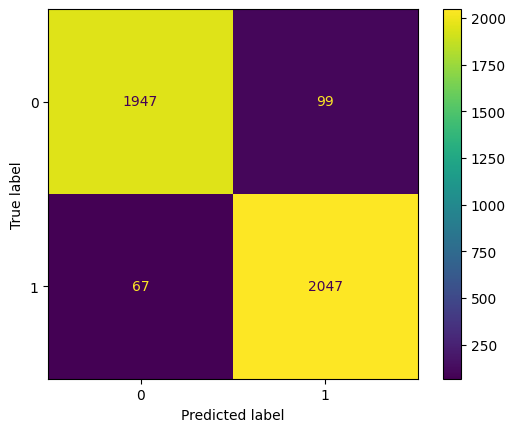

In [ ]:
conf_matrix(svc_model)

In [67]:
class_report(svc_model)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2046
           1       0.95      0.97      0.96      2114

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



## DecisionTreeClassifier

In [ ]:
depth_num= range(50, 71, 2)
training_acc= []
testing_acc = []
for depth in depth_num:
    tree_model = DecisionTreeClassifier(max_depth=depth,random_state=42)
    tree_model.fit(tfid_x_train,y_train)
    training_acc.append(tree_model.score(tfid_x_train,y_train))
    testing_acc.append(tree_model.score(tfid_x_test,y_test))

In [ ]:
print("Training Accuracy Scores:", training_acc[:3])
print("testing Accuracy Scores:", testing_acc[:3])

Training Accuracy Scores: [0.9989182692307692, 0.9994591346153846, 0.9995192307692308]
testing Accuracy Scores: [0.8793269230769231, 0.8798076923076923, 0.8814903846153846]


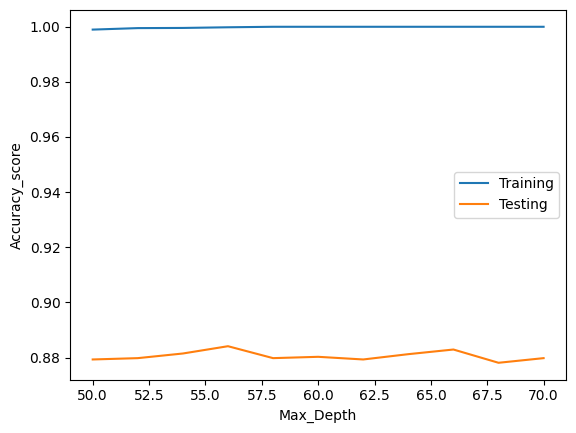

In [ ]:
plt.plot(depth_num , training_acc , label= 'Training')
plt.plot(depth_num , testing_acc , label= 'Testing')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy_score')
plt.legend();

In [ ]:
# final model
tree_final_model=DecisionTreeClassifier(max_depth=58,random_state=42)
tree_final_model.fit(tfid_x_train,y_train)
tree_training_acc = tree_final_model.score(tfid_x_train,y_train)
tree_testing_acc = tree_final_model.score(tfid_x_test,y_test)
print(f"Training accuracy of DesicionTreeClassifier is {tree_training_acc}")
print(f"testing accuracy of DesicionTreeClassifier is {tree_testing_acc}")

Training accuracy of DesicionTreeClassifier is 0.9999399038461538
testing accuracy of DesicionTreeClassifier is 0.8798076923076923


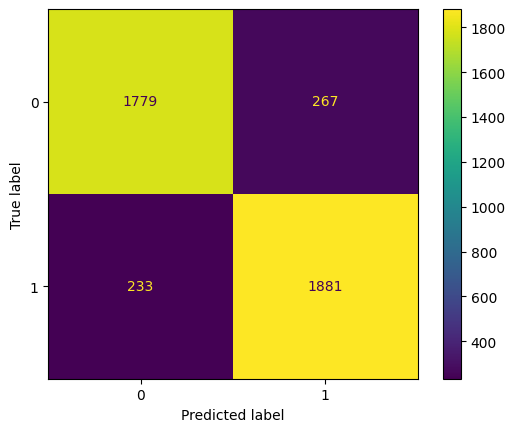

In [ ]:
conf_matrix(tree_final_model)

In [ ]:
class_report(tree_final_model)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2046
           1       0.88      0.89      0.88      2114

    accuracy                           0.88      4160
   macro avg       0.88      0.88      0.88      4160
weighted avg       0.88      0.88      0.88      4160



## RandomForestClassifier

In [68]:
clf= RandomForestClassifier(random_state=0)
params={
    "n_estimators": range(50,125,25),
    "max_depth": [50]
}
params

{'n_estimators': range(50, 125, 25), 'max_depth': [50]}

In [69]:
rfc_model = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs= -1,
    verbose=1
)

In [70]:
rfc_model.fit(tfid_x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [50], 'n_estimators': range(50, 125, 25)},
             verbose=1)

In [71]:
cv_results= pd.DataFrame(rfc_model.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,72.103901,7.478938,0.747405,0.070355,50,100,"{'max_depth': 50, 'n_estimators': 100}",0.917668,0.917368,0.917368,0.917368,0.916466,0.917248,0.000408,1
1,59.386189,3.578961,0.694839,0.234814,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.914964,0.912260,0.916466,0.910757,0.918570,0.914603,0.002815,2
0,39.279220,1.726026,0.468922,0.180618,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.905649,0.904748,0.909255,0.907752,0.912260,0.907933,0.002678,3


In [72]:
rfc_model.best_params_

{'max_depth': 50, 'n_estimators': 100}

In [73]:
rfc_model.predict(tfid_x_test)

array([0, 1, 1, ..., 0, 1, 1])

In [74]:
acc_train = rfc_model.score(tfid_x_train , y_train)
acc_test = rfc_model.score(tfid_x_test , y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 0.9953
test accuracy: 0.9173


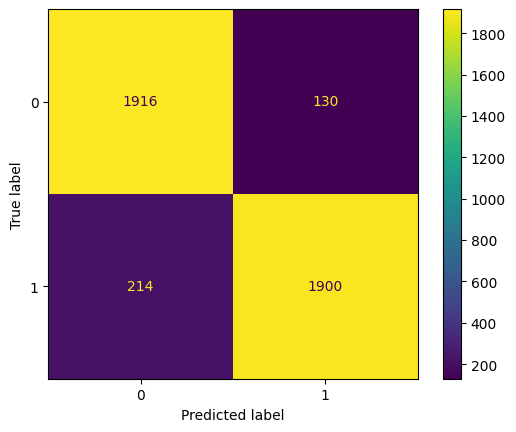

In [75]:
conf_matrix(rfc_model)

In [76]:
class_report(rfc_model)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2046
           1       0.94      0.90      0.92      2114

    accuracy                           0.92      4160
   macro avg       0.92      0.92      0.92      4160
weighted avg       0.92      0.92      0.92      4160



##PassiveAggressiveClassifier

In [ ]:
PA = PassiveAggressiveClassifier(max_iter=50)

In [77]:
train(PA, 'PassiveAggressiveClassifier')

Training accuracy of PassiveAggressiveClassifier is 0.9999399038461538
testing accuracy of PassiveAggressiveClassifier is 0.963701923076923


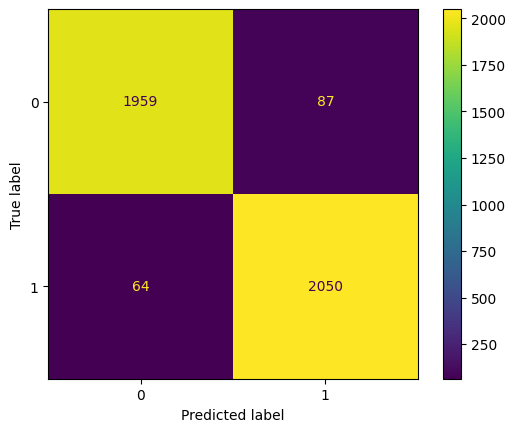

In [78]:
conf_matrix(PA)

In [79]:
class_report(PA)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2046
           1       0.96      0.97      0.96      2114

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



##MULTINOMIAL NAIVE BAYES

In [80]:
MNB = MultinomialNB()

In [81]:
train(MNB, 'MultinomialNaiveBayes')

Training accuracy of MultinomialNaiveBayes is 0.9003004807692307
testing accuracy of MultinomialNaiveBayes is 0.8435096153846153


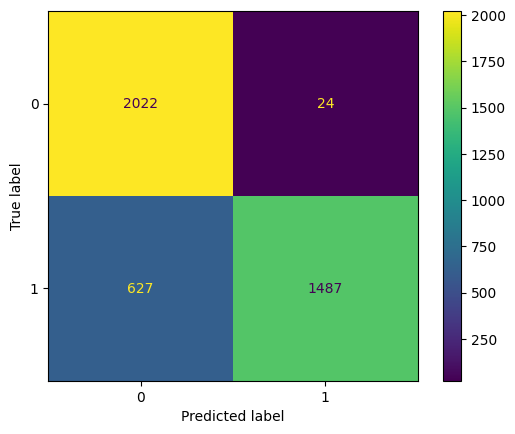

In [82]:
conf_matrix(MNB)

In [83]:
class_report(MNB)

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      2046
           1       0.98      0.70      0.82      2114

    accuracy                           0.84      4160
   macro avg       0.87      0.85      0.84      4160
weighted avg       0.88      0.84      0.84      4160



##Gradient Boosting Classifier


In [88]:
GBC = GradientBoostingClassifier()

In [89]:
train(GBC, 'GradientBoostingClassifier')

Training accuracy of GradientBoostingClassifier is 0.9383413461538461
testing accuracy of GradientBoostingClassifier is 0.9216346153846153


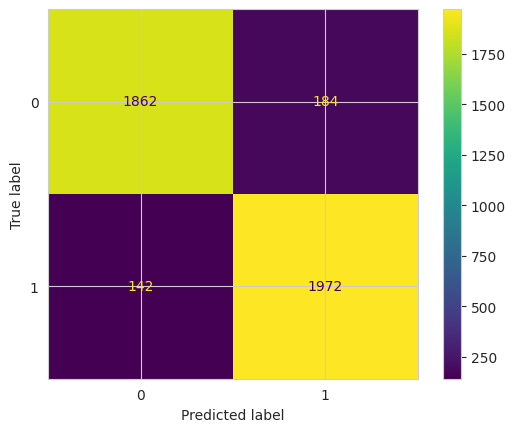

In [90]:
conf_matrix(GBC)

In [91]:
class_report(GBC)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2046
           1       0.91      0.93      0.92      2114

    accuracy                           0.92      4160
   macro avg       0.92      0.92      0.92      4160
weighted avg       0.92      0.92      0.92      4160



##Results


In [92]:
models = pd.DataFrame({
    
    "Models": ["Logestic Regression" , "SVM", "DecisionTreeClassifier","RandomForestClassifier","PasssiveAggressiveClassifier","MultinomialNaiveBayes","GradientBoostingClassifier"],
    "Score":[model_lr.score(tfid_x_test,y_test), svc_model.score(tfid_x_test,y_test), tree_testing_acc, acc_test, PA.score(tfid_x_test,y_test), MNB.score(tfid_x_test,y_test), GBC.score(tfid_x_test,y_test) ]
    
})
models.sort_values(by="Score" , ascending=True)

,Models,Score
5,MultinomialNaiveBayes,0.843510
2,DecisionTreeClassifier,0.879808
3,RandomForestClassifier,0.917308
6,GradientBoostingClassifier,0.921635
0,Logestic Regression,0.944712
1,SVM,0.960096
4,PasssiveAggressiveClassifier,0.963702


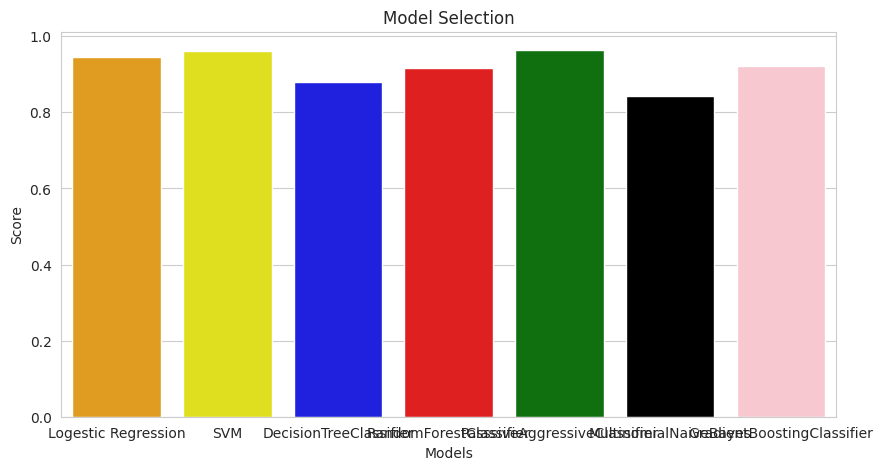

In [93]:
colors= ['orange','yellow','blue','red','green','black','pink']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=models['Models'],y=models['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")
plt.show();

##Predictions

In [94]:
def predict(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = PA.predict(vectorized_input_data)
    if prediction == 0:
      prediction = "Real News"
    else:
      prediction = "Fake News"
    print(prediction)

In [95]:
predict('Abortion Pill Orders Rise in 7 Latin American Nations on Zika Alert - The New York Times')

Real News


In [96]:
predict('President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.')

Fake News


## Create model

In [97]:
import pickle
pickle.dump(tree_final_model,open('model.pkl', 'wb'))

In [98]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))